In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms
import numpy as np

import argparse
import sys

import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
sys.path.insert(0,'/root/pytorch-neat/')
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=args.solDim,out_channels=hidden_dim,kernel_size=1)
        self.conv2 =  nn.Conv1d(in_channels=hidden_dim,out_channels=args.solDim,kernel_size=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):

        x= self.conv1(x)
        x= self.relu(x)
        x=self.conv2 (x)
        x= self.sigmoid(x)
        return x

def train(args, model,  optimizer, epoch): # 还可添加loss_func等参数
    #model.train() # 必备，将模型设置为训练模式
    for i in range(400): # 从数据加载器迭代一个batch的数据
        data=torch.from_numpy(output.astype(np.float32)).view([1,2,1])
        output = model(data).detach().numpy()[0]  # 喂入数据并前向传播获取输出
        loss =torch.from_numpy(np.array([(output[0]-0.3)**2+(output[1]-0.7)**2])).requires_grad_()
        #optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if i % args.log_interval == 0: # 根据设置的显式间隔输出训练日志
            print(i,loss)

legalList={0: [24, 78], 1: [3, 29, 59, 83, 116], 2: [], 3: [1, 43, 64, 83, 90, 161], 4: [], 5: [], 6: [25, 151], 7: [12, 16, 19, 29, 36, 79, 118, 136, 166], 8: [], 9: [26, 30, 64], 10: [79, 109, 138, 181], 11: [], 12: [7, 17, 29, 31, 36, 79], 13: [197], 14: [], 15: [133, 148], 16: [7, 32], 17: [12, 31, 36, 82, 119], 18: [29, 182], 19: [7, 24, 36, 71, 85, 140, 183], 20: [29], 21: [46, 173, 193], 22: [], 23: [], 24: [0, 19, 30, 64], 25: [6, 54, 151], 26: [9, 40, 59, 64, 111, 145], 27: [69, 106], 28: [115], 29: [1, 7, 12, 18, 20, 43, 59, 83, 116, 136, 182, 185], 30: [9, 24, 156], 31: [12, 17, 164], 32: [16, 40, 64], 33: [94], 34: [], 35: [], 36: [7, 12, 17, 19, 82, 136], 37: [108, 124], 38: [121], 39: [], 40: [26, 32, 146], 41: [96], 42: [177], 43: [3, 29, 48, 83, 104, 128, 136, 182, 185], 44: [180], 45: [131, 137], 46: [21, 148, 178, 193], 47: [], 48: [43, 67, 104, 135], 49: [], 50: [], 51: [], 52: [], 53: [151], 54: [25, 136], 55: [129], 56: [137, 186], 57: [148], 58: [], 59: [1, 26, 29, 120, 185], 60: [143], 61: [], 62: [], 63: [67, 115, 155], 64: [3, 9, 24, 26, 32, 71], 65: [93, 97, 194], 66: [], 67: [48, 63, 135, 155], 68: [126], 69: [27], 70: [], 71: [19, 64, 156, 183], 72: [106, 123, 144, 194], 73: [94, 180, 196], 74: [], 75: [125], 76: [102], 77: [196], 78: [0, 127], 79: [7, 10, 12, 103], 80: [], 81: [125, 140], 82: [17, 36, 106, 112, 129], 83: [1, 3, 29, 43, 108, 116, 151, 182], 84: [89, 92, 157], 85: [19, 147, 195], 86: [117], 87: [111], 88: [158], 89: [84, 166], 90: [3], 91: [95], 92: [84, 149, 157], 93: [65], 94: [33, 73], 95: [91, 155], 96: [41], 97: [65, 100, 112, 123, 195], 98: [], 99: [], 100: [97, 101], 101: [100], 102: [76, 141], 103: [79, 122, 199], 104: [43, 48], 105: [], 106: [27, 72, 82, 123, 157, 188, 194], 107: [171], 108: [37, 83, 117], 109: [10, 181], 110: [146], 111: [26, 87, 130], 112: [82, 97, 145], 113: [145], 114: [], 115: [28, 63], 116: [1, 29, 83, 117], 117: [86, 108, 116], 118: [7, 122, 162, 167, 182], 119: [17, 122, 172], 120: [59], 121: [38, 130], 122: [103, 118, 119, 199], 123: [72, 97, 106, 129, 144, 157, 173, 194], 124: [37, 184, 187], 125: [75, 81, 140, 141, 154], 126: [68], 127: [78], 128: [43], 129: [55, 82, 123, 170, 194], 130: [111, 121], 131: [45], 132: [161], 133: [15, 155], 134: [195], 135: [48, 67, 155], 136: [7, 29, 36, 43, 54, 153], 137: [45, 56, 182], 138: [10], 139: [], 140: [19, 81, 125, 179, 183], 141: [102, 125], 142: [], 143: [60], 144: [72, 123, 194], 145: [26, 112, 113, 155], 146: [40, 110], 147: [85, 195], 148: [15, 46, 57, 188, 193], 149: [92, 157], 150: [189], 151: [6, 25, 53, 83, 159], 152: [], 153: [136, 155, 185], 154: [125, 183], 155: [63, 67, 95, 133, 135, 145, 153, 158, 178], 156: [30, 71], 157: [84, 92, 106, 123, 149], 158: [88, 155], 159: [151], 160: [193], 161: [3, 132], 162: [118, 167], 163: [], 164: [31], 165: [], 166: [7, 89], 167: [118, 162], 168: [], 169: [], 170: [129], 171: [107], 172: [119], 173: [21, 123], 174: [], 175: [], 176: [], 177: [42], 178: [46, 155], 179: [140], 180: [44, 73, 194, 196], 181: [10, 109], 182: [18, 29, 43, 83, 118, 137], 183: [19, 71, 140, 154], 184: [124], 185: [29, 43, 59, 153], 186: [56], 187: [124], 188: [106, 148], 189: [150], 190: [], 191: [], 192: [], 193: [21, 46, 148, 160], 194: [65, 72, 106, 123, 129, 144, 180, 195], 195: [85, 97, 134, 147, 194, 198], 196: [73, 77, 180], 197: [13], 198: [195], 199: [103, 122]}


## UCB index

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=args.solDim,out_channels=hidden_dim,kernel_size=1)
        self.conv2 =  nn.Conv1d(in_channels=hidden_dim,out_channels=args.solDim,kernel_size=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout= nn.Dropout(0.02)

    def forward(self, x):

        if np.random.random()>0: #> epsilon:
            x= self.conv1(x)
            x= self.relu(x)
            x=self.conv2 (x)
            if i<2:
                x=self.dropout(x)
            x= self.sigmoid(x)
            return  x
        else:
            return torch.from_numpy(np.array([np.random.choice([0,1],p=[1-args.card/args.solDim,args.card/args.solDim])  for _ in range(args.solDim)])).view([1,args.solDim,1])        


def train(args, model,  optimizer, epoch): # 还可添加loss_func等参数
    #model.train() # 必备，将模型设置为训练模式
    for i in range(400): # 从数据加载器迭代一个batch的数据
        data=torch.from_numpy(output.astype(np.float32)).view([1,2,1])
        output = model(data).detach().numpy()[0]  # 喂入数据并前向传播获取输出
        loss =torch.from_numpy(np.array([(output[0]-0.3)**2+(output[1]-0.7)**2])).requires_grad_()
        #optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if i % args.log_interval == 0: # 根据设置的显式间隔输出训练日志
            print(i,loss)

cmpe = CircuitMPE('/root/PySDD/notebooks/syn200.vtree', '/root/PySDD/notebooks/syn200.sdd')
rateList=np.load('rateListSyn200.npy')
Q=np.load('Q.npy')
Q=torch.from_numpy(Q).float()
#cmpe = CircuitMPE('4-grid-out.vtree.sd', '4-grid-all-pairs-sd.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=0
        self.solDim=200
        self.card=20
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=50
args=para()

torch.manual_seed(args.seed) # 设置随机种子，保证可重复性
legalList={0: [24, 78], 1: [3, 29, 59, 83, 116], 2: [], 3: [1, 43, 64, 83, 90, 161], 4: [], 5: [], 6: [25, 151], 7: [12, 16, 19, 29, 36, 79, 118, 136, 166], 8: [], 9: [26, 30, 64], 10: [79, 109, 138, 181], 11: [], 12: [7, 17, 29, 31, 36, 79], 13: [197], 14: [], 15: [133, 148], 16: [7, 32], 17: [12, 31, 36, 82, 119], 18: [29, 182], 19: [7, 24, 36, 71, 85, 140, 183], 20: [29], 21: [46, 173, 193], 22: [], 23: [], 24: [0, 19, 30, 64], 25: [6, 54, 151], 26: [9, 40, 59, 64, 111, 145], 27: [69, 106], 28: [115], 29: [1, 7, 12, 18, 20, 43, 59, 83, 116, 136, 182, 185], 30: [9, 24, 156], 31: [12, 17, 164], 32: [16, 40, 64], 33: [94], 34: [], 35: [], 36: [7, 12, 17, 19, 82, 136], 37: [108, 124], 38: [121], 39: [], 40: [26, 32, 146], 41: [96], 42: [177], 43: [3, 29, 48, 83, 104, 128, 136, 182, 185], 44: [180], 45: [131, 137], 46: [21, 148, 178, 193], 47: [], 48: [43, 67, 104, 135], 49: [], 50: [], 51: [], 52: [], 53: [151], 54: [25, 136], 55: [129], 56: [137, 186], 57: [148], 58: [], 59: [1, 26, 29, 120, 185], 60: [143], 61: [], 62: [], 63: [67, 115, 155], 64: [3, 9, 24, 26, 32, 71], 65: [93, 97, 194], 66: [], 67: [48, 63, 135, 155], 68: [126], 69: [27], 70: [], 71: [19, 64, 156, 183], 72: [106, 123, 144, 194], 73: [94, 180, 196], 74: [], 75: [125], 76: [102], 77: [196], 78: [0, 127], 79: [7, 10, 12, 103], 80: [], 81: [125, 140], 82: [17, 36, 106, 112, 129], 83: [1, 3, 29, 43, 108, 116, 151, 182], 84: [89, 92, 157], 85: [19, 147, 195], 86: [117], 87: [111], 88: [158], 89: [84, 166], 90: [3], 91: [95], 92: [84, 149, 157], 93: [65], 94: [33, 73], 95: [91, 155], 96: [41], 97: [65, 100, 112, 123, 195], 98: [], 99: [], 100: [97, 101], 101: [100], 102: [76, 141], 103: [79, 122, 199], 104: [43, 48], 105: [], 106: [27, 72, 82, 123, 157, 188, 194], 107: [171], 108: [37, 83, 117], 109: [10, 181], 110: [146], 111: [26, 87, 130], 112: [82, 97, 145], 113: [145], 114: [], 115: [28, 63], 116: [1, 29, 83, 117], 117: [86, 108, 116], 118: [7, 122, 162, 167, 182], 119: [17, 122, 172], 120: [59], 121: [38, 130], 122: [103, 118, 119, 199], 123: [72, 97, 106, 129, 144, 157, 173, 194], 124: [37, 184, 187], 125: [75, 81, 140, 141, 154], 126: [68], 127: [78], 128: [43], 129: [55, 82, 123, 170, 194], 130: [111, 121], 131: [45], 132: [161], 133: [15, 155], 134: [195], 135: [48, 67, 155], 136: [7, 29, 36, 43, 54, 153], 137: [45, 56, 182], 138: [10], 139: [], 140: [19, 81, 125, 179, 183], 141: [102, 125], 142: [], 143: [60], 144: [72, 123, 194], 145: [26, 112, 113, 155], 146: [40, 110], 147: [85, 195], 148: [15, 46, 57, 188, 193], 149: [92, 157], 150: [189], 151: [6, 25, 53, 83, 159], 152: [], 153: [136, 155, 185], 154: [125, 183], 155: [63, 67, 95, 133, 135, 145, 153, 158, 178], 156: [30, 71], 157: [84, 92, 106, 123, 149], 158: [88, 155], 159: [151], 160: [193], 161: [3, 132], 162: [118, 167], 163: [], 164: [31], 165: [], 166: [7, 89], 167: [118, 162], 168: [], 169: [], 170: [129], 171: [107], 172: [119], 173: [21, 123], 174: [], 175: [], 176: [], 177: [42], 178: [46, 155], 179: [140], 180: [44, 73, 194, 196], 181: [10, 109], 182: [18, 29, 43, 83, 118, 137], 183: [19, 71, 140, 154], 184: [124], 185: [29, 43, 59, 153], 186: [56], 187: [124], 188: [106, 148], 189: [150], 190: [], 191: [], 192: [], 193: [21, 46, 148, 160], 194: [65, 72, 106, 123, 129, 144, 180, 195], 195: [85, 97, 134, 147, 194, 198], 196: [73, 77, 180], 197: [13], 198: [195], 199: [103, 122]}

def checkFea(x):
    cnt=0
    cntT=0
    x=(x[0]>0.5).float().view(args.solDim)
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
                print('hhhhhhhhhhhhhhh')
    return  cnt/cntT/2+abs(sum(x)-args.card)/args.card/2

use_cuda = True#not args.no_cuda and torch.cuda.is_available() # 根据输入参数和实际cuda的有无决定是否使用GPU
device = torch.device("cuda") # if use_cuda else "cpu" 设置使用CPU or GPU
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} # 设置数据加载的子进程数；是否返回之前将张量复制到cuda的页锁定内存
hidden_dim=args.hidden_dim
fmin,fmax,gmin,gmax=None,None,None,None

# Example of using Sequential
model =Net()#.to('cuda') #MPNN(6,20,10,3,6)

def weights_init(mod):
    """设计初始化函数"""
    classname=mod.__class__.__name__
    # 返回传入的module类型
    print(classname)
    if classname.find('Conv')!= -1:    #这里的Conv和BatchNnorm是torc.nn里的形式
        mod.weight.data.normal_(-0.1,0.2)
    elif classname.find('BatchNorm')!= -1:
        mod.weight.data.normal_(1.0,0.2) #bn层里初始化γ，服从（1，0.02）的正态分布
        mod.bias.data.fill_(0)  #bn层里初始化β，默认为0

model.apply(weights_init)
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) # 实例化求解器
losslist=[]
optlistUCB=[]
feasiblelistUCB=[]
rounds=1
cntList=np.ones(args.solDim)

for i in range(400): # 从数据加载器迭代一个batch的数据
    xdata,ydata=[],[]
    
    for _ in range(args.batch_size):
        data=torch.from_numpy(rateList.astype(np.float32)).view([1,args.solDim,1])#.to(device)
        output = model.forward(data)#.detach().numpy()[0]  # 喂入数据并前向传播获取输出
        yu=torch.unbind(output.view(args.solDim)) #(output[0]>0.5).float()
        xu = torch.unbind(data.view(args.solDim))
        wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu])
        tmpoutput=output+torch.from_numpy(np.array([np.sqrt(np.log(rounds)/mm) for mm in cntList])).view([1,args.solDim,1])    
        tmp=sorted(tmpoutput.view(args.solDim).detach().numpy())[-args.card:]
        tmp1=[1 if tmpoutput.view(args.solDim)[i] in tmp else 0 for i in range(args.solDim)]
        output = torch.from_numpy(np.array(tmp1)).view([1,args.solDim,1])    
        cntList+=(output.view(args.solDim).detach().numpy())
        #loss= 0.2*(sum(sorted(rateList[:args.solDim])[:])-torch.mm((output[0]).view([1,args.solDim]),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1])))-args.wmc*torch.log(torch.mean(wmc))
        loss=(sum(output[0])-args.card)**2-args.wmc*torch.log(torch.mean(wmc)).float()-torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float())
        loss=loss.float()
        loss=loss.requires_grad_()
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        ydata.append(np.array(yu))
        xdata.append(np.array(data))
        losslist.append(loss.detach().numpy())
        feasiblelistUCB.append(1-checkFea(output))
        optlistUCB.append(torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float()))
        #print((sum(sorted(rateList[:args.solDim])[-args.card:])-torch.mm(action.view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float())),g)
        print(i,checkFea(output),loss.detach().numpy(),sum((output[0]>0.5)).item() ,torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float()) )
        rounds+=1
    follow_constraints= float(np.sum([cmpe.weighted_model_count([(1-p, p) for p in  np.concatenate((o, inp))]) for o, inp in zip(np.array(np.array(ydata).reshape([args.batch_size,args.solDim]) + 0.5, int), np.array(xdata).reshape([args.batch_size,args.solDim]))]))/args.batch_size
    
    print('Percentage of predictions that follow constraint: ',follow_constraints)
        
    #if i % args.log_interval == 0: # 根据设置的显式间隔输出训练日志
     #   print(loss)
#for epoch in range(1, args.epochs + 1): # 循环调用train() and test() 进行epoch迭代
 #   train(args, model,optimizer=optimizer, epoch=epoch)
losslist=[i[0][0] for i in losslist]

Conv1d
Conv1d
ReLU
Sigmoid
Dropout
Net
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
0 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
0 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
0 tensor(0.0022) [[-33.65623]] 20 tensor([[33.6562]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
0 tensor(0.0044) [[-34.72404]] 20 tensor([[34.7240]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
0 tensor(0.0044) [[-34.425144]] 20 tensor([[34.4251]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hh

hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
2 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
2 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
2 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
Percentage of predictions that follow constraint:  0.0
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
3 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
3 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhh

hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
5 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
5 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
5 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
5 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
5 tensor(0.0044) [[-34.78474]] 20 tensor([[34.7847]])
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhhhhhhh
hhhhhhhhhh

KeyboardInterrupt: 

# TS

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=args.solDim,out_channels=hidden_dim,kernel_size=1)
        self.conv2 =  nn.Conv1d(in_channels=hidden_dim,out_channels=args.solDim,kernel_size=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout= nn.Dropout(0.02)

    def forward(self, x):

        if np.random.random()>0.03: #> epsilon:
            x= self.conv1(x)
            x= self.relu(x)
            x=self.conv2 (x)
            if i<2:
                x=self.dropout(x)
            x= self.sigmoid(x)
            return  x
        else:
            return torch.from_numpy(np.random.random(args.solDim)).view([1,args.solDim,1])        


def train(args, model,  optimizer, epoch): # 还可添加loss_func等参数
    #model.train() # 必备，将模型设置为训练模式
    for i in range(400): # 从数据加载器迭代一个batch的数据
        data=torch.from_numpy(output.astype(np.float32)).view([1,2,1])
        output = model(data).detach().numpy()[0]  # 喂入数据并前向传播获取输出
        loss =torch.from_numpy(np.array([(output[0]-0.3)**2+(output[1]-0.7)**2])).requires_grad_()
        #optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if i % args.log_interval == 0: # 根据设置的显式间隔输出训练日志
            print(i,loss)

cmpe = CircuitMPE('/root/PySDD/notebooks/syn200.vtree', '/root/PySDD/notebooks/syn200.sdd')
rateList=np.load('rateListSyn200.npy')
Q=np.load('Q.npy')
Q=torch.from_numpy(Q).float()
#cmpe = CircuitMPE('4-grid-out.vtree.sd', '4-grid-all-pairs-sd.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=2
        self.solDim=200
        self.card=20
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=50
args=para()

cntList=np.ones(args.solDim)

torch.manual_seed(args.seed) # 设置随机种子，保证可重复性
legalList={0: [24, 78], 1: [3, 29, 59, 83, 116], 2: [], 3: [1, 43, 64, 83, 90, 161], 4: [], 5: [], 6: [25, 151], 7: [12, 16, 19, 29, 36, 79, 118, 136, 166], 8: [], 9: [26, 30, 64], 10: [79, 109, 138, 181], 11: [], 12: [7, 17, 29, 31, 36, 79], 13: [197], 14: [], 15: [133, 148], 16: [7, 32], 17: [12, 31, 36, 82, 119], 18: [29, 182], 19: [7, 24, 36, 71, 85, 140, 183], 20: [29], 21: [46, 173, 193], 22: [], 23: [], 24: [0, 19, 30, 64], 25: [6, 54, 151], 26: [9, 40, 59, 64, 111, 145], 27: [69, 106], 28: [115], 29: [1, 7, 12, 18, 20, 43, 59, 83, 116, 136, 182, 185], 30: [9, 24, 156], 31: [12, 17, 164], 32: [16, 40, 64], 33: [94], 34: [], 35: [], 36: [7, 12, 17, 19, 82, 136], 37: [108, 124], 38: [121], 39: [], 40: [26, 32, 146], 41: [96], 42: [177], 43: [3, 29, 48, 83, 104, 128, 136, 182, 185], 44: [180], 45: [131, 137], 46: [21, 148, 178, 193], 47: [], 48: [43, 67, 104, 135], 49: [], 50: [], 51: [], 52: [], 53: [151], 54: [25, 136], 55: [129], 56: [137, 186], 57: [148], 58: [], 59: [1, 26, 29, 120, 185], 60: [143], 61: [], 62: [], 63: [67, 115, 155], 64: [3, 9, 24, 26, 32, 71], 65: [93, 97, 194], 66: [], 67: [48, 63, 135, 155], 68: [126], 69: [27], 70: [], 71: [19, 64, 156, 183], 72: [106, 123, 144, 194], 73: [94, 180, 196], 74: [], 75: [125], 76: [102], 77: [196], 78: [0, 127], 79: [7, 10, 12, 103], 80: [], 81: [125, 140], 82: [17, 36, 106, 112, 129], 83: [1, 3, 29, 43, 108, 116, 151, 182], 84: [89, 92, 157], 85: [19, 147, 195], 86: [117], 87: [111], 88: [158], 89: [84, 166], 90: [3], 91: [95], 92: [84, 149, 157], 93: [65], 94: [33, 73], 95: [91, 155], 96: [41], 97: [65, 100, 112, 123, 195], 98: [], 99: [], 100: [97, 101], 101: [100], 102: [76, 141], 103: [79, 122, 199], 104: [43, 48], 105: [], 106: [27, 72, 82, 123, 157, 188, 194], 107: [171], 108: [37, 83, 117], 109: [10, 181], 110: [146], 111: [26, 87, 130], 112: [82, 97, 145], 113: [145], 114: [], 115: [28, 63], 116: [1, 29, 83, 117], 117: [86, 108, 116], 118: [7, 122, 162, 167, 182], 119: [17, 122, 172], 120: [59], 121: [38, 130], 122: [103, 118, 119, 199], 123: [72, 97, 106, 129, 144, 157, 173, 194], 124: [37, 184, 187], 125: [75, 81, 140, 141, 154], 126: [68], 127: [78], 128: [43], 129: [55, 82, 123, 170, 194], 130: [111, 121], 131: [45], 132: [161], 133: [15, 155], 134: [195], 135: [48, 67, 155], 136: [7, 29, 36, 43, 54, 153], 137: [45, 56, 182], 138: [10], 139: [], 140: [19, 81, 125, 179, 183], 141: [102, 125], 142: [], 143: [60], 144: [72, 123, 194], 145: [26, 112, 113, 155], 146: [40, 110], 147: [85, 195], 148: [15, 46, 57, 188, 193], 149: [92, 157], 150: [189], 151: [6, 25, 53, 83, 159], 152: [], 153: [136, 155, 185], 154: [125, 183], 155: [63, 67, 95, 133, 135, 145, 153, 158, 178], 156: [30, 71], 157: [84, 92, 106, 123, 149], 158: [88, 155], 159: [151], 160: [193], 161: [3, 132], 162: [118, 167], 163: [], 164: [31], 165: [], 166: [7, 89], 167: [118, 162], 168: [], 169: [], 170: [129], 171: [107], 172: [119], 173: [21, 123], 174: [], 175: [], 176: [], 177: [42], 178: [46, 155], 179: [140], 180: [44, 73, 194, 196], 181: [10, 109], 182: [18, 29, 43, 83, 118, 137], 183: [19, 71, 140, 154], 184: [124], 185: [29, 43, 59, 153], 186: [56], 187: [124], 188: [106, 148], 189: [150], 190: [], 191: [], 192: [], 193: [21, 46, 148, 160], 194: [65, 72, 106, 123, 129, 144, 180, 195], 195: [85, 97, 134, 147, 194, 198], 196: [73, 77, 180], 197: [13], 198: [195], 199: [103, 122]}

def checkFea(x):
    cnt=0
    cntT=0
    x=(x[0]>0.5).float().view(args.solDim)
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
                print('hhhhhhhhhhhhhhh')
    return  cnt/cntT/2+abs(sum(x)-args.card)/args.card/2

use_cuda = True#not args.no_cuda and torch.cuda.is_available() # 根据输入参数和实际cuda的有无决定是否使用GPU
device = torch.device("cuda") # if use_cuda else "cpu" 设置使用CPU or GPU
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} # 设置数据加载的子进程数；是否返回之前将张量复制到cuda的页锁定内存
hidden_dim=args.hidden_dim
fmin,fmax,gmin,gmax=None,None,None,None

# Example of using Sequential
model =Net()#.to('cuda') #MPNN(6,20,10,3,6)

def weights_init(mod):
    """设计初始化函数"""
    classname=mod.__class__.__name__
    # 返回传入的module类型
    print(classname)
    if classname.find('Conv')!= -1:    #这里的Conv和BatchNnorm是torc.nn里的形式
        mod.weight.data.normal_(-0.1,0.2)
    elif classname.find('BatchNorm')!= -1:
        mod.weight.data.normal_(1.0,0.2) #bn层里初始化γ，服从（1，0.02）的正态分布
        mod.bias.data.fill_(0)  #bn层里初始化β，默认为0

model.apply(weights_init)
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) # 实例化求解器
losslist=[]
optlist=[]
feasiblelist=[]
rounds=1
for i in range(400): # 从数据加载器迭代一个batch的数据
    xdata,ydata=[],[]
    
    for _ in range(args.batch_size):
        data=torch.from_numpy(rateList.astype(np.float32)).view([1,args.solDim,1])#.to(device)
        output = model.forward(data)#.detach().numpy()[0]  # 喂入数据并前向传播获取输出
        yu=torch.unbind(output.view(args.solDim)) #(output[0]>0.5).float()
        xu = torch.unbind(data.view(args.solDim))
        wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu])
        tmpoutput= torch.from_numpy(np.array([np.random.beta(mm,1-mm) for mm in output.view([args.solDim]).detach().numpy()])  )
        tmp=sorted(tmpoutput.view(args.solDim).detach().numpy())[-args.card:]
        tmp1=[1 if tmpoutput.view(args.solDim)[i] in tmp else 0 for i in range(args.solDim)]
        output = torch.from_numpy(np.array(tmp1)).view([1,args.solDim,1])    
        cntList+=(output.view(args.solDim).detach().numpy())
        #loss= 0.2*(sum(sorted(rateList[:args.solDim])[:])-torch.mm((output[0]).view([1,args.solDim]),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1])))-args.wmc*torch.log(torch.mean(wmc))
        loss=(sum(output[0])-args.card)**2-args.wmc*torch.log(torch.mean(wmc)).float()-torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float())
        loss=loss.float()
        loss=loss.requires_grad_()
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        ydata.append(np.array(yu))
        xdata.append(np.array(data))
        losslist.append(loss.detach().numpy())
        feasiblelist.append(1-checkFea(output))
        optlist.append(torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float()))
        #print((sum(sorted(rateList[:args.solDim])[-args.card:])-torch.mm(action.view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float())),g)
        print(i,checkFea(output),loss.detach().numpy(),sum((output[0]>0.5)).item() ,torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float()) )
        rounds+=1
    follow_constraints= float(np.sum([cmpe.weighted_model_count([(1-p, p) for p in  np.concatenate((o, inp))]) for o, inp in zip(np.array(np.array(ydata).reshape([args.batch_size,args.solDim]) + 0.5, int), np.array(xdata).reshape([args.batch_size,args.solDim]))]))/args.batch_size
    
    print('Percentage of predictions that follow constraint: ',follow_constraints)
        
    #if i % args.log_interval == 0: # 根据设置的显式间隔输出训练日志
     #   print(loss)
#for epoch in range(1, args.epochs + 1): # 循环调用train() and test() 进行epoch迭代
 #   train(args, model,optimizer=optimizer, epoch=epoch)
losslist=[i[0][0] for i in losslist]

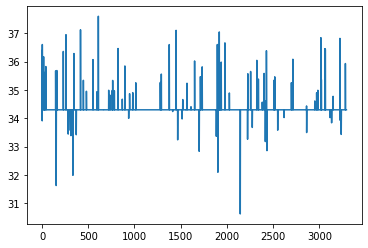

In [6]:
plt.plot(optlist)

In [ ]:
import matplotlib.pyplot as plt


f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(optlist[:100])
ax.plot([4.529585900000e+00]*100)
ax2.plot(feasiblelist[:100])
ax.legend(['Results','gt'])
ax.set_xlabel(' Value of goal function')
ax.title.set_text('Yahoo! Dataset')
ax2.set_xlabel(' Percentage of satisfied constraints')
ax2.title.set_text('Yahoo! Dataset')

In [61]:
sum(sorted(rateList)[-20:])

46.80811213663027